In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import datetime as dt
import time
plt.style.use('dark_background')

In [2]:
df = pd.read_csv("dataset.csv")

<AxesSubplot:>

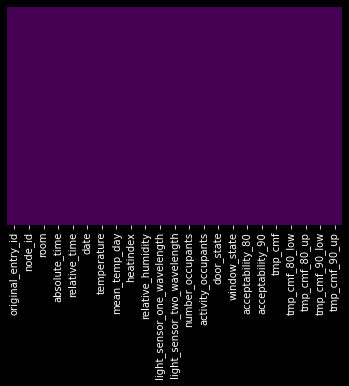

In [3]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [4]:
df.columns

Index(['original_entry_id', 'node_id', 'room', 'absolute_time',
       'relative_time', 'date', 'temperature', 'mean_temp_day', 'heatindex',
       'relative_humidity', 'light_sensor_one_wavelength',
       'light_sensor_two_wavelength', 'number_occupants', 'activity_occupants',
       'door_state', 'window_state', 'acceptability_80', 'acceptability_90',
       'tmp_cmf', 'tmp_cmf_80_low', 'tmp_cmf_80_up', 'tmp_cmf_90_low',
       'tmp_cmf_90_up'],
      dtype='object')

# Univariate
## original_entry_id

In [5]:
df['original_entry_id'].describe()

count    540364.000000
mean       2647.015486
std        2209.330762
min           1.000000
25%         939.000000
50%        2050.000000
75%        3836.000000
max       13349.000000
Name: original_entry_id, dtype: float64

### result
original_entry_id will be removed from the data because it doesn't impact the user satisfaction

## node_id

In [6]:
df['node_id'].describe()

count    540364.000000
mean          2.477682
std           1.176078
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           5.000000
Name: node_id, dtype: float64

<AxesSubplot:xlabel='node_id', ylabel='count'>

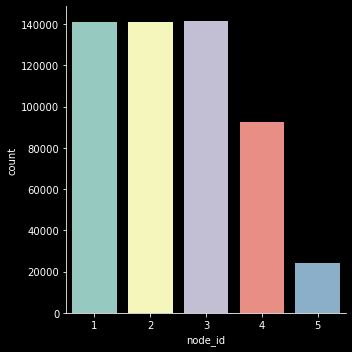

In [7]:
sns.catplot(x="node_id", data=df, kind='count', order=[1,2,3,4,5]).facet_axis(0, 0)

### result
We can see that the first 3 nodes all have the same amount of records,
this is because all 3 rooms in which the experiment took place atleast have 3 nodes.
Then 2 rooms also have another 4th node and one room has a 5th

## room

In [8]:
df['room'].describe()

count     540364
unique         3
top            A
freq      273145
Name: room, dtype: object

<AxesSubplot:xlabel='room', ylabel='count'>

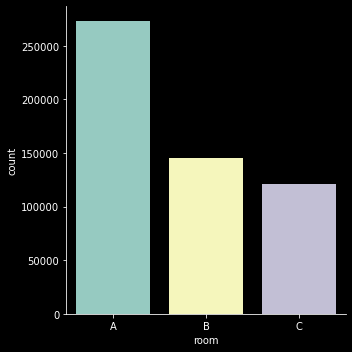

In [9]:
sns.catplot(x="room", data=df, kind='count', order=["A","B","C"]).facet_axis(0, 0)


In [7]:
df['window_state'].describe()

count    540364.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: window_state, dtype: float64

### result
We can see that there is a clear room with more records than the others, this means that in the final model room A will
be more represented and weigh more in the prediction. We have to think about the implications of this.

## date

In [10]:
date_and_count_array = {}
for index, row in df.iterrows():
    date = row['date'][3:10]
    if date in date_and_count_array:
        date_and_count_array[date] = date_and_count_array.get(date, 0) + 1
    else:
        date_and_count_array[date] = 1

In [11]:
date_count_dataframe = pd.DataFrame(data=date_and_count_array.items(), columns=['date', 'count'])
date_count_dataframe.head()

,date,count
0,03/2016,236420
1,04/2016,182518
2,01/2017,63427
3,02/2017,57999


<AxesSubplot:xlabel='date', ylabel='count'>

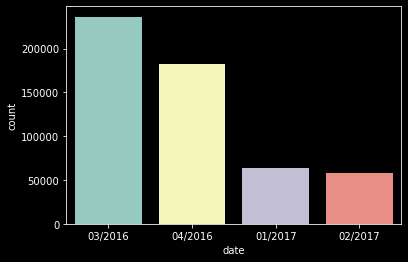

In [12]:
sns.barplot( data=date_count_dataframe, x="date", y="count", order=["03/2016", "04/2016", "01/2017", "02/2017"])

### result
We can see that there is a clear difference with the amount of records per month of recorded data. This can lead to a balance for a more hot climate since the most records come from after winter.
## temperature

In [13]:
df['temperature'].describe()

count    540364.000000
mean         21.966373
std           0.729373
min          20.420000
25%          21.370000
50%          22.020000
75%          22.400000
max          25.470000
Name: temperature, dtype: float64

<AxesSubplot:xlabel='temperature', ylabel='Count'>

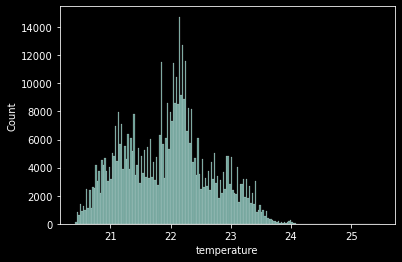

In [17]:
sns.histplot(x="temperature", data=df)

# Multivariate

## temperature

TODO: make it so its mean temp per hour per selected month

In [14]:
# df_march_2016 = df[df['date'].str.contains('03/2016',case=False)]
# plt.rcParams["figure.figsize"] = (13,10)
# sns.lineplot( data=df_march_2016, x="date", y="temperature")

In [ ]:
df.columns

In [ ]:
def convert_room(x):
    if(str(x).upper() == 'A'):
        return 0
    if(str(x).upper() == 'B'):
        return 1
    if(str(x).upper() == 'C'):
        return 2
    else:
        return -1
plt.rcParams["figure.figsize"] = (13,10)
df['room'] = df['room'].apply(convert_room)
mask = df[['original_entry_id', 'room', 
       'relative_time',  'temperature', 'mean_temp_day', 'heatindex',
       'relative_humidity',  'number_occupants', 'activity_occupants',
       'door_state', 'window_state', 'acceptability_80', 'acceptability_90']]
sns.heatmap(mask.corr(), annot = True,  vmin =-1, vmax = 1, center = 0)